In [1]:
# auto reload

%load_ext autoreload
%autoreload 2

In [2]:
from dsd import DATA_DIR
from dsd.diffusion_rendering import *




/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an e

In [3]:
image_dir = DATA_DIR / "renders/mugs/10/ACE_Coffee_Mug_Kristen/000"
input_images = DiffusionRenderInputImages.from_render_dir(image_dir)
#input_images.depth_image[input_images.depth_image > 1.0] = 1.0


In [4]:
import matplotlib.pyplot as plt
def visualize_results(rgb,control, images):
    # plot original image and depth, as well as the processed images
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(rgb)
    axes[0].set_title("RGB")
    axes[1].imshow(control)
    axes[1].set_title("Control Image")
    axes[2].imshow(images[0])
    axes[2].set_title("prompted")
    axes[3].imshow(images[1])
    axes[3].set_title("prompted")
    axes[4].imshow(images[2])
    axes[4].set_title("prompted")
    axes[5].imshow(images[3])
    axes[5].set_title("prompted")
    plt.show()

In [8]:
strength = 1.0
controlnet_conditioning_scale = 1.3
n_steps = 5
prompt = "a blue mug on a red table, photorealistic"

In [ ]:
renderer = ControlNetTXTFromDepthRenderer(num_inference_steps=50,controlnet_conditioning_scale=controlnet_conditioning_scale,strength=strength)


  0%|          | 0/50 [00:00<?, ?it/s]

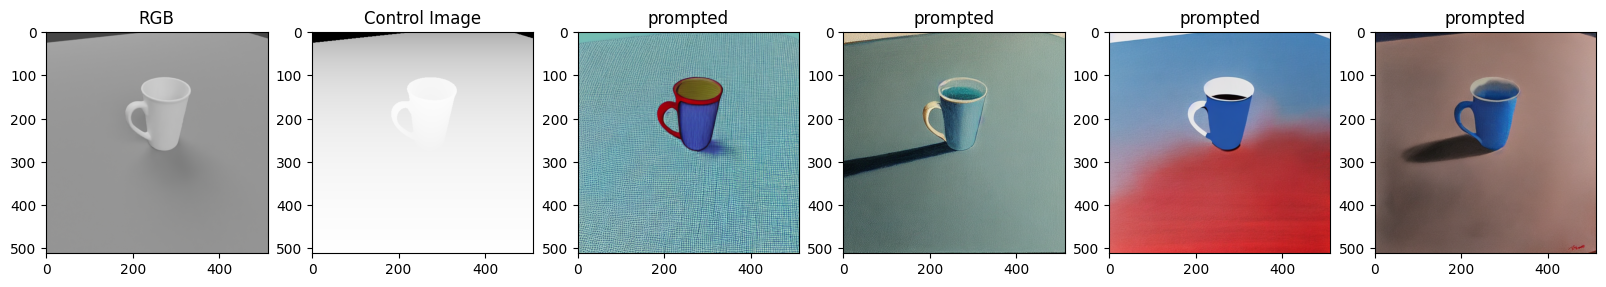

In [9]:


images = renderer(prompt, input_images)
visualize_results(input_images.rgb_image, renderer.get_control_image(input_images)[0].numpy().transpose(1,2,0),images)

In [ ]:

renderer = ControlNetFromDepthRenderer(num_inference_steps=50,controlnet_conditioning_scale=controlnet_conditioning_scale,strength=strength)
images = renderer(prompt, input_images)
visualize_results(input_images.rgb_image, renderer.get_control_image(input_images)[0].numpy().transpose(1,2,0),images)